In [276]:
import numpy as np
import sympy as sym
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.optimize as spo
from scipy.stats import norm
from tqdm import tqdm

In [277]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/DataRotacion.csv'
data = pd.read_csv(url)
data

D = data.copy()
D.drop(D[(D['angle'] != 30) ].index, inplace=True)
D

def Model_y(h,omega,lambd,g):
    return ((2*np.sqrt(2)) / 3 ) * omega * np.cos(lambd*np.pi/180) * np.sqrt((h**3/g))

def X2_Function(omega, y, h, sigmay, g):
    return np.sum ((y - Model_y(h, omega, 30, g))**2/(2*sigmay**2) )

y = np.array(D['y'])
h = np.array(D['h'])
sigmay = np.array(D['sigmay'])
N = len(y)

p0 = np.ones(1)

nll = lambda *p: X2_Function(*p)
result = minimize(nll, p0, args = (y, h, sigmay, 9.81), options = {'disp':True})
bestparam = result.x

result.x

Optimization terminated successfully.
         Current function value: 1.145718
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4


array([7.24399804e-05])

<ErrorbarContainer object of 3 artists>

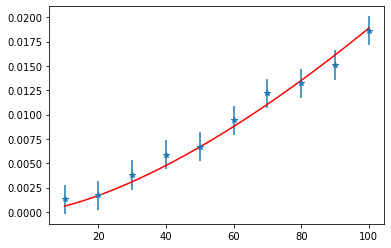

In [278]:
_x = np.linspace(np.min(h),np.max(h),1000)
_y = Model_y(_x,bestparam, 30, 9.81)
plt.plot(_x,_y,color='r')
plt.errorbar(h, y, yerr = sigmay, fmt = '*')

In [279]:
#intento diferente

N = 300
Gravedad = np.zeros(N)
Omega = np.zeros(N)

for i in range(N):
    g = 9.81 + np.random.normal(loc  = 0, scale = 1)
    Gravedad[i] = g

    y_nuevo = np.abs(y + np.random.normal( loc = 0, scale = sigmay[0], size = len(y)))
    
    result = minimize(nll, x0 = [0], args = (y_nuevo, h, sigmay, Gravedad[i]), options={'disp':False})

    Omega[i] = result.x

gridy = np.linspace(min(Gravedad),max(Gravedad),30)
gridx = np.linspace(min(Omega),max(Omega),30)

H2, binsx, binsy = np.histogram2d(Omega, Gravedad, bins=(gridx,gridy))

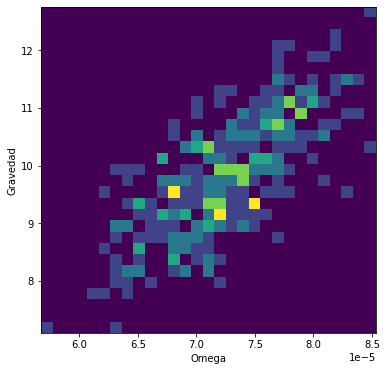

In [328]:
plt.figure(figsize = (6,6))
plt.imshow(H2.T, origin='lower', extent=[binsx[0], binsx[-1], binsy[0], binsy[-1]],aspect='auto')
plt.xlabel('Omega')
plt.ylabel('Gravedad')
plt.show()

In [325]:
H1 = np.sum(H2,axis=1)

cs = np.cumsum(H1)

ij = np.searchsorted( cs, np.percentile(cs,16) )
ii = np.searchsorted( cs, np.percentile(cs,50) )
ji = np.searchsorted( cs, np.percentile(cs,84) )

#tamaño del percentil
t = (ji-ij)
Omega[t]

7.263872467734578e-05